In [1]:
# mount drive
from google.colab import drive
drive.mount("/drive") 

Mounted at /drive


In [2]:
# imports
import numpy as np
import pandas as pd

In [3]:
# imports for plots
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

pio.templates.default = "plotly_white"

In [4]:
# load data
data = pd.read_csv("/drive/My Drive/Colab Notebooks/AgriEdge/datasets/processed_weather_3.csv")

In [5]:
# parameter
col_name = "cumulative_RH2M"

# this will be determined automatically
# nb_cluster = 4

metric = "euclidean"
linkage_method = "ward"

In [6]:
# prepare data

frame = {}

for year in data["crop_year"].value_counts().sort_index().index:
  # select crop year
  query = data["crop_year"] == year
  frame[year] = data[query][col_name].values


# build data and then transpose
data_cluster = pd.DataFrame(frame)
data_cluster = data_cluster.T

In [7]:
# check that the operation is successful
# make a plot of the col for a certain crop year
index_year = 0
x, y = data_cluster.columns, data_cluster.values[index_year]

fig = go.Figure(data=[
                      go.Scatter(x=x, y=y),

])

fig.update_layout(
    title=f"{col_name} for crop year {data_cluster.index[index_year]}",
    height=500,
    width=800
)

fig.show()

In [8]:
# look of data
data_cluster

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268
1982,27.83,74.09,126.76,164.12,192.60,226.32,281.64,345.40,397.14,469.65,536.28,600.46,654.69,704.59,748.91,800.31,842.89,880.21,918.43,961.16,1002.27,1044.08,1081.42,1122.89,1174.16,1220.72,1267.15,1304.13,1335.48,1372.51,1411.59,1445.74,1493.28,1543.37,1587.98,1637.33,1680.31,1719.49,1755.53,1791.77,...,15038.31,15108.89,15176.79,15243.49,15312.54,15382.25,15450.57,15515.40,15580.54,15648.06,15710.60,15769.03,15825.12,15872.32,15924.66,15983.70,16045.47,16105.74,16165.99,16226.34,16281.60,16340.76,16399.60,16457.18,16512.51,16575.11,16620.51,16664.70,16706.09,16743.39,16777.57,16834.06,16899.76,16954.72,17007.32,17058.15,17110.71,17164.16,17212.46,17253.39
1983,49.25,96.29,157.58,230.84,290.13,350.24,434.74,517.19,587.93,650.80,699.05,742.46,788.02,840.02,892.08,946.99,1001.77,1055.72,1108.69,1162.28,1223.45,1289.74,1355.14,1421.24,1499.71,1581.15,1655.59,1720.90,1786.08,1857.22,1938.06,2014.69,2083.50,2142.93,2199.38,2263.11,2325.34,2384.15,2427.38,2477.81,...,15145.20,15193.27,15234.80,15282.75,15333.48,15391.45,15448.35,15498.15,15546.98,15585.64,15625.88,15663.96,15695.46,15723.14,15746.73,15770.73,15804.96,15845.68,15888.92,15937.33,15980.64,16029.32,16083.04,16136.05,16189.91,16246.41,16297.84,16342.37,16388.31,16440.20,16483.97,16529.89,16581.25,16630.73,16682.67,16736.02,16787.95,16836.75,16884.74,16929.64
1984,53.75,106.35,170.57,223.25,257.77,283.96,305.44,332.97,387.29,457.10,510.61,554.63,609.10,664.38,716.90,777.39,830.07,882.76,943.99,1026.01,1097.93,1172.92,1252.48,1324.43,1390.68,1460.34,1533.42,1599.53,1660.13,1717.03,1794.22,1876.15,1952.35,2035.05,2113.12,2173.15,2239.67,2320.15,2404.81,2483.45,...,15645.09,15713.31,15770.66,15832.30,15904.22,15966.50,16025.84,16083.43,16133.84,16180.66,16229.48,16279.91,16324.27,16371.42,16414.25,16457.63,16511.82,16577.79,16640.52,16702.51,16759.85,16814.06,16871.14,16930.24,16991.18,17049.89,17098.48,17143.31,17187.37,17239.40,17290.35,17338.98,17382.29,17424.78,17458.46,17485.96,17520.82,17561.67,17604.38,17644.16
1985,39.67,81.80,124.78,175.33,236.46,304.43,362.30,403.10,436.08,466.96,519.99,578.38,638.59,686.63,727.09,757.14,790.73,841.44,909.12,960.95,1014.63,1094.79,1165.00,1235.70,1316.93,1397.95,1476.08,1551.33,1630.95,1704.47,1785.55,1867.73,1943.03,2017.93,2101.60,2183.87,2263.04,2333.24,2397.70,2461.16,...,14341.43,14400.31,14455.66,14507.76,14560.99,14616.82,14667.90,14716.16,14761.05,14807.51,14855.17,14905.06,14957.54,15007.37,15051.91,15091.82,15138.68,15192.77,15252.64,15296.59,15348.41,15397.26,15444.41,15488.42,15530.06,15566.94,15607.62,15654.13,15702.39,15750.87,15796.91,15849.86,15900.46,15936.35,15974.39,16012.73,16036.13,16074.82,16116.93,16152.18
1986,30.60,62.01,98.20,141.18,195.40,245.88,282.29,323.01,370.30,413.00,453.56,502.81,564.86,614.53,660.40,704.70,747.55,794.68,858.63,923.53,982.00,1047.97,1116.11,1163.20,1193.66,1220.65,1258.60,1300.13,1368.09,1426.73,1496.40,1575.26,1648.96,1728.05,1799.15,1879.60,1954.02,2033.19,2094.22,2145.32,...,15385.37,15450.31,15522.42,15583.81,15643.16,15710.69,15772.77,15827.45,15885.34,15949.55,16003.29,16047.73,16092.17,16138.10,16190.82,16241.12,16291.29,16351.28,16412.47,16474.78,16528.70,16580.62,16633.12,16687.41,16739.05,16790.17,16841.34,16893.85,16939.45,16983.03,17023.92,17073.62,17123.16,17169.86,17217.02,17262.79,17304.06,17346.63,17382.67,17415.81
1987,73.83,144.31,215.65,290.76,355.71,410.90,467.60,534.26,607.68,680.66,757.10,822.33,877.52,924.08,970.26,1024.67,1087.84,1151.65,1215.65,1281.34,1339.16,1382.77,1416.18,1454.57,1522.06,1581.87,1634.59,1688.31,1764.38,1840.76,1909.99,1992.15,2063.44,2135.82,2207.88,2280.37,2352.71,2434.04,2515.76,2603.09,...,15037.31,15078.51,15126.35,15177.20,15224.22,15273.75,15319.99,15373.46,1

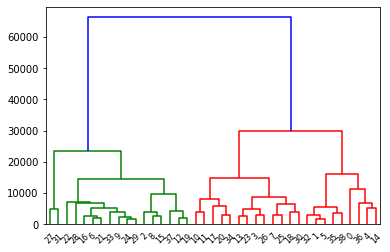

In [9]:
# dendrogram to have an idea about aggregation procedure
# and the evolution between cluster distance

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(data_cluster, metric=metric, method=linkage_method)
# fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [10]:
# use Calanski-Harabasz index
# to choose the right number of cluster

from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


# where to store CH index
arr_calanski = {}

# max possible number of cluster
max_k = 10

# data
X = data_cluster

# loop over number of clusters
for k in range(2, max_k):
  # build model 
  model = AgglomerativeClustering(n_clusters=k, linkage=linkage_method, affinity=metric)
  model = model.fit(X)

  # clusters label
  labels = model.fit_predict(X)

  # compute calanski metric
  m = metrics.calinski_harabasz_score(X, labels)

  arr_calanski[k] = m


# plot of CH index
fig = go.Figure(data=[
                      go.Scatter(x=list(arr_calanski.keys()), y=list(arr_calanski.values()))
])

fig.update_layout(
    width=800,
    height=500,
    xaxis_title="number of cluster",
    yaxis_title="Calanski-Harbasz index"
)

fig.show()

In [11]:
# suitable number of cluster
nb_cluster = max(arr_calanski.items(), key=lambda u: u[1])[0]

In [12]:
# perform clustring for k = nb_cluster
from sklearn.cluster import AgglomerativeClustering


# data
X = data_cluster

# build clustering model
model = AgglomerativeClustering(n_clusters=nb_cluster, linkage=linkage_method, affinity=metric)
model = model.fit(X)

# assign cluster lable to each observation
data_cluster[f"cluster_{col_name}"] = model.fit_predict(data_cluster)

In [13]:
# isolate each cluster

dict_cluster = {}

for cluster_index in range(nb_cluster):
  query = data_cluster[f"cluster_{col_name}"] == cluster_index

  # drop col of cluster
  copy_data = data_cluster[query].copy()
  copy_data = copy_data.drop(labels=[f"cluster_{col_name}"], axis=1)

  dict_cluster[cluster_index] = copy_data


In [14]:
dict_cluster[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268
1982,27.83,74.09,126.76,164.12,192.60,226.32,281.64,345.40,397.14,469.65,536.28,600.46,654.69,704.59,748.91,800.31,842.89,880.21,918.43,961.16,1002.27,1044.08,1081.42,1122.89,1174.16,1220.72,1267.15,1304.13,1335.48,1372.51,1411.59,1445.74,1493.28,1543.37,1587.98,1637.33,1680.31,1719.49,1755.53,1791.77,...,15038.31,15108.89,15176.79,15243.49,15312.54,15382.25,15450.57,15515.40,15580.54,15648.06,15710.60,15769.03,15825.12,15872.32,15924.66,15983.70,16045.47,16105.74,16165.99,16226.34,16281.60,16340.76,16399.60,16457.18,16512.51,16575.11,16620.51,16664.70,16706.09,16743.39,16777.57,16834.06,16899.76,16954.72,17007.32,17058.15,17110.71,17164.16,17212.46,17253.39
1983,49.25,96.29,157.58,230.84,290.13,350.24,434.74,517.19,587.93,650.80,699.05,742.46,788.02,840.02,892.08,946.99,1001.77,1055.72,1108.69,1162.28,1223.45,1289.74,1355.14,1421.24,1499.71,1581.15,1655.59,1720.90,1786.08,1857.22,1938.06,2014.69,2083.50,2142.93,2199.38,2263.11,2325.34,2384.15,2427.38,2477.81,...,15145.20,15193.27,15234.80,15282.75,15333.48,15391.45,15448.35,15498.15,15546.98,15585.64,15625.88,15663.96,15695.46,15723.14,15746.73,15770.73,15804.96,15845.68,15888.92,15937.33,15980.64,16029.32,16083.04,16136.05,16189.91,16246.41,16297.84,16342.37,16388.31,16440.20,16483.97,16529.89,16581.25,16630.73,16682.67,16736.02,16787.95,16836.75,16884.74,16929.64
1985,39.67,81.80,124.78,175.33,236.46,304.43,362.30,403.10,436.08,466.96,519.99,578.38,638.59,686.63,727.09,757.14,790.73,841.44,909.12,960.95,1014.63,1094.79,1165.00,1235.70,1316.93,1397.95,1476.08,1551.33,1630.95,1704.47,1785.55,1867.73,1943.03,2017.93,2101.60,2183.87,2263.04,2333.24,2397.70,2461.16,...,14341.43,14400.31,14455.66,14507.76,14560.99,14616.82,14667.90,14716.16,14761.05,14807.51,14855.17,14905.06,14957.54,15007.37,15051.91,15091.82,15138.68,15192.77,15252.64,15296.59,15348.41,15397.26,15444.41,15488.42,15530.06,15566.94,15607.62,15654.13,15702.39,15750.87,15796.91,15849.86,15900.46,15936.35,15974.39,16012.73,16036.13,16074.82,16116.93,16152.18
1986,30.60,62.01,98.20,141.18,195.40,245.88,282.29,323.01,370.30,413.00,453.56,502.81,564.86,614.53,660.40,704.70,747.55,794.68,858.63,923.53,982.00,1047.97,1116.11,1163.20,1193.66,1220.65,1258.60,1300.13,1368.09,1426.73,1496.40,1575.26,1648.96,1728.05,1799.15,1879.60,1954.02,2033.19,2094.22,2145.32,...,15385.37,15450.31,15522.42,15583.81,15643.16,15710.69,15772.77,15827.45,15885.34,15949.55,16003.29,16047.73,16092.17,16138.10,16190.82,16241.12,16291.29,16351.28,16412.47,16474.78,16528.70,16580.62,16633.12,16687.41,16739.05,16790.17,16841.34,16893.85,16939.45,16983.03,17023.92,17073.62,17123.16,17169.86,17217.02,17262.79,17304.06,17346.63,17382.67,17415.81
1987,73.83,144.31,215.65,290.76,355.71,410.90,467.60,534.26,607.68,680.66,757.10,822.33,877.52,924.08,970.26,1024.67,1087.84,1151.65,1215.65,1281.34,1339.16,1382.77,1416.18,1454.57,1522.06,1581.87,1634.59,1688.31,1764.38,1840.76,1909.99,1992.15,2063.44,2135.82,2207.88,2280.37,2352.71,2434.04,2515.76,2603.09,...,15037.31,15078.51,15126.35,15177.20,15224.22,15273.75,15319.99,15373.46,15424.45,15470.15,15518.65,15567.33,15614.23,15670.59,15712.20,15750.06,15786.75,15836.87,15884.17,15938.30,15987.61,16031.38,16075.19,16118.29,16163.41,16200.35,16235.51,16279.37,16326.32,16373.26,16414.56,16456.32,16501.34,16560.30,16627.72,16682.93,16728.40,16774.08,16827.46,16880.48
1989,69.99,136.22,205.89,277.35,353.10,416.93,467.38,520.19,576.04,620.58,660.03,703.80,760.58,808.12,850.38,912.70,974.41,1032.64,1094.40,1146.44,1207.06,1257.73,1316.81,1383.05,1448.05,1518.16,1585.44,1663.18,1733.06,1810.43,1877.41,1938.13,1995.40,2056.37,2123.72,2195.68,2259.87,2327.85,2410.35,2488.66,...,14810.27,14871.34,14932.57,14992.95,15050.63,15112.08,15172.80,15233.57

In [15]:
# plot each cluster
x = data_cluster.columns
arr_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

fig = make_subplots(rows=1, cols=nb_cluster,
                    subplot_titles=[f"Cluster {i}" for i in range(nb_cluster)])


for cluster_index in dict_cluster.keys():
  for arr in dict_cluster[cluster_index].values:
    fig.add_trace(
        go.Scatter(x=x, y=arr, marker_color=arr_colors[cluster_index]),
        row=1, col=cluster_index + 1
    )

  fig.update_yaxes(range=[0, np.max(data_cluster.values)], row=1, col=cluster_index + 1)
  fig.update_xaxes(title="days")


fig.update_layout(
    title=f"Clusters by {col_name}",
    showlegend=False
)

fig.show()

In [16]:
# mean of each cluster and std
dict_mean_std_clusters = {}

for i in dict_cluster.keys():
  cluster_observations  = dict_cluster[i].values

  dict_mean_std_clusters[i] = {
      "mean": np.mean(a=cluster_observations, axis=0),
      "std": np.std(a=cluster_observations, axis=0),
  }


In [17]:
# plot of mean of each cluster

fig = go.Figure(data=[
                      go.Scatter(
                          x=data_cluster.columns,
                          y=dict_mean_std_clusters[i]["mean"],
                          name=f"cluster {i}")
                      for i in dict_mean_std_clusters.keys()
])

fig.update_layout(
    width=800,
    height=500,
    title="Centroid of each cluster"
)

fig.show()

In [18]:
# proportion of each cluster
# year in each cluster

dict_len_cluster = {}
total_nb_years = len(data_cluster)

for i in dict_cluster.keys():
  dict_len_cluster[i] = len(dict_cluster[i] / total_nb_years)

In [19]:
# pie chart
fig = go.Figure(data=[
                      go.Pie(labels=[f"cluster {i}" for i in dict_len_cluster.keys()], values=list(dict_len_cluster.values()))
])


fig.update_layout(
    title=f"Clusters proportion {col_name}"
)

fig.show()

In [20]:
# crop year in each cluster

fig = go.Figure(data=[
                      go.Table(header=dict(values=[f"cluster {i}" for i in dict_len_cluster.keys()]),
                               cells=dict(values=[d.index for d in dict_cluster.values()]))
                     ])
fig.show()

In [21]:
# plots of crop years

fig = go.Figure()

for key, d in dict_cluster.items():
  fig.add_trace(
      go.Scatter(
          x=d.index, 
          y=[0 for year in d.index], 
          name=f"cluster_{key}",
          mode="markers"
          )
  )

fig.show()

In [22]:
# clusters labels
model.fit_predict(data_cluster)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0])